<a href="https://colab.research.google.com/github/Dipak22/DeepLearning/blob/master/Multi_label_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [5]:
path.ls()

(#8) [Path('test.json'),Path('train'),Path('train.csv'),Path('train.json'),Path('test'),Path('valid.json'),Path('test.csv'),Path('segmentation')]

In [4]:
Path.BASE_PATH = path

In [7]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [8]:
(path/'train').ls()

(#5012) [Path('train/004239.jpg'),Path('train/006647.jpg'),Path('train/009488.jpg'),Path('train/009896.jpg'),Path('train/008166.jpg'),Path('train/006190.jpg'),Path('train/009841.jpg'),Path('train/007483.jpg'),Path('train/005259.jpg'),Path('train/006878.jpg'),Path('train/006123.jpg'),Path('train/009758.jpg'),Path('train/006887.jpg'),Path('train/006042.jpg'),Path('train/006520.jpg'),Path('train/007011.jpg'),Path('train/005052.jpg'),Path('train/001882.jpg'),Path('train/001830.jpg'),Path('train/009754.jpg')...]

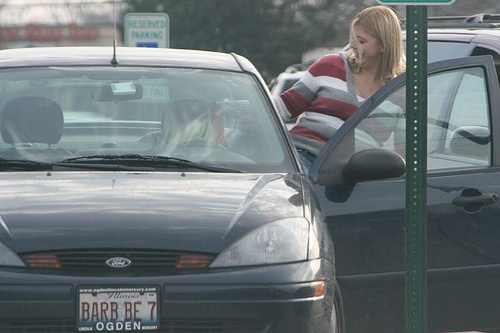

In [20]:
sample_image = Image.open((path/'train'/'005499.jpg'))
sample_image

In [12]:
dblock = DataBlock()

In [13]:
dsets = dblock.datasets(df)

In [15]:
len(dsets.train), len(dsets.valid)

(4009, 1002)

In [16]:
x,y = dsets.train[0]

In [17]:
x,y

(fname       005130.jpg
 labels            bird
 is_valid         False
 Name: 2570, dtype: object,
 fname       005130.jpg
 labels            bird
 is_valid         False
 Name: 2570, dtype: object)

In [18]:
dblock = DataBlock(get_x = lambda r: r['fname'],
                   get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('000589.jpg', 'person')

In [19]:
def get_x(r):
  return r['fname']
def get_y(r):
  return r['labels']
dblock = DataBlock(get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('005499.jpg', 'car person')

In [23]:
def get_x(r):
  return path/'train'/r['fname']
def get_y(r):
  return r['labels'].split(' ')
dblock = DataBlock(get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('train/004723.jpg'), ['person'])

In [24]:
dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   get_x = get_x,
                   get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=320x240,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [27]:
idxs = torch.where(dsets.train[0][1] == 1.)[0]
dsets.train.vocab[idxs]

(#1) ['cat']

In [28]:
def splitter(df):
  train = df.index[~df['is_valid']].tolist()
  valid = df.index[~df['is_valid']].tolist()
  return train,valid

dbBlock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                    splitter = splitter,
                    get_x = get_x,
                    get_y  = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x335,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 1., 0.]))

In [31]:
len(dsets.valid.vocab)

20

In [42]:
dblock = DataBlock(blocks = (ImageBlock, MultiCategoryBlock),
                    splitter = splitter,
                    get_x = get_x,
                    get_y  = get_y,
                    item_tfms = RandomResizedCrop(128, min_scale = 0.35))
dls = dblock.dataloaders(df)


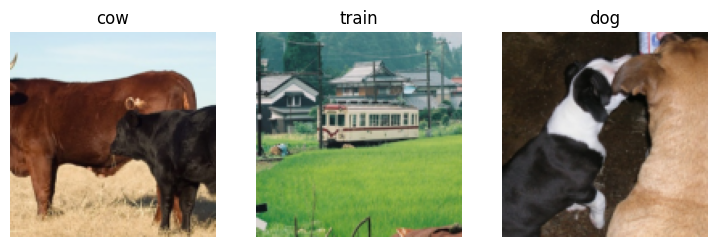

In [44]:
dls.train.show_batch(nrows=1, ncols=3)

In [45]:
learn = vision_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 97.2MB/s]


In [46]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [47]:
activs[0]

TensorImage([ 0.0672,  0.0917, -2.4353,  3.1100, -1.5142, -2.5813, -1.4846,
              1.4638, -1.1303, -2.7804,  0.8677, -0.8238, -0.0288, -0.0119,
              0.4642, -0.2884, -0.5818,  1.9491,  2.6025,  2.5809],
            grad_fn=<AliasBackward0>)

In [49]:
loss_func = nn.BCEWithLogitsLoss()
#lsss = loss_func(activs, y)
loss = loss_func(TensorBase(activs), TensorBase(y))
loss

TensorBase(1.0055, grad_fn=<AliasBackward0>)

In [50]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [51]:
learn = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 78.7MB/s]


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.950515,0.684319,0.228748,08:41
1,0.828964,0.518254,0.300440,08:39
2,0.608972,0.175969,0.839424,08:38
3,0.359616,0.094726,0.957477,08:39


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.128969,0.076686,0.967413,11:27
1,0.113356,0.059532,0.973091,11:33
2,0.096856,0.054842,0.975730,11:19
